In [1]:
#Tensorflow nedir ?
#Google Tarafından geliştirilen ve açık kaynaklı geliştirilen kütüphane diyebilirz.
#Derin öğrenme ve makine öğreniminde karşımıza sıklıkla çıkan,
#ve modellerimizi eğitmenin, oluşturmanın, belli başlı işlemler yapmanın olmazsa olmazı diyebiliriz.

In [2]:
#playground

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("bisiklet_fiyatlari.xlsx")
data.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
data.shape

(1000, 3)

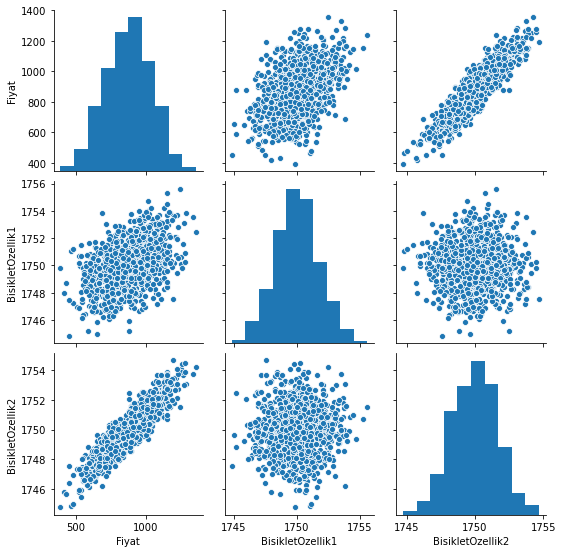

In [6]:
sns.pairplot(data);

In [7]:
# Veriyi train-test olarak ikiye ayırmak

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#y = wx + b
#y -> label
y = data["Fiyat"].values
X = data[["BisikletOzellik1", "BisikletOzellik2"]].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 15)

In [11]:
X_train.shape

(670, 2)

In [12]:
X_test.shape

(330, 2)

In [13]:
y_train.shape

(670,)

In [14]:
y_test.shape

(330,)

In [15]:
#Modeli Oluşturmak

In [16]:
#scaling : boyutunu değiştirmek(büyültmek veya küçültmek)
# özellikle nöronlara vereceğimiz veri setini küçük hale getirmek istiyoruz
# bu işlem bize bir şey kaybettirmiyor şu an
#daha güzel bir şekilde sonuç almamıza olanak tanıyor

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [20]:
X_test

array([[ 0.56706914,  0.70743354],
       [ 0.45694459,  0.23213923],
       [ 0.54990366,  0.48049092],
       [ 0.2940838 ,  0.62874574],
       [ 0.25255028,  0.65552399],
       [-0.01410839,  0.26503552],
       [ 0.47207615,  0.58340399],
       [ 0.44645595,  0.66652423],
       [ 0.71271197,  0.47558898],
       [ 0.52327593,  0.65795133],
       [ 0.51589828,  0.35124843],
       [ 0.68132069,  0.46394647],
       [ 0.34838222,  0.66396795],
       [ 0.59835704,  0.66492102],
       [ 0.7743903 ,  0.65539702],
       [ 0.36366154,  0.34590211],
       [ 0.38364758,  0.85598251],
       [ 0.15783877,  0.41240613],
       [ 0.3581219 ,  0.90091814],
       [ 0.54142039,  0.49688287],
       [ 0.49003412,  0.52974122],
       [ 0.61542611,  0.26192082],
       [ 0.5697328 , -0.01882354],
       [ 0.15993374,  0.36593875],
       [ 0.58693437,  0.41410011],
       [ 0.66459019,  0.6746364 ],
       [ 0.37258234,  0.37907714],
       [ 0.37582535,  0.4277929 ],
       [ 0.36091834,

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#sequential: bizim modelimizin aslında sınıfı ve modelimizi bu sınıftan oluşturuyoruz
#ondan sonra içerisinde hangi katmanlarla çalısacağız onu belirtiyoruz
#dense: katmanlar

In [23]:
model = Sequential()

model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")

In [24]:
model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795849.2500
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795734.1250
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795608.1250
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795463.9375
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 795292.8750
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 795086.6250
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 794843.1875
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 794557.2500
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 794226.5625
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 793842.6875
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 793402.3750
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

21/21 [==============================] - 0s 855us/step - loss: 59896.6797
Epoch 96/250
21/21 [==============================] - 0s 855us/step - loss: 49460.6211
Epoch 97/250
21/21 [==============================] - 0s 902us/step - loss: 39953.8398
Epoch 98/250
21/21 [==============================] - 0s 807us/step - loss: 31516.0801
Epoch 99/250
21/21 [==============================] - 0s 950us/step - loss: 24125.9980
Epoch 100/250
21/21 [==============================] - 0s 855us/step - loss: 17875.8809
Epoch 101/250
21/21 [==============================] - 0s 855us/step - loss: 12907.0791
Epoch 102/250
21/21 [==============================] - ETA: 0s - loss: 10071.154 - 0s 902us/step - loss: 9318.9824
Epoch 103/250
21/21 [==============================] - 0s 807us/step - loss: 6968.8994
Epoch 104/250
21/21 [==============================] - 0s 712us/step - loss: 5781.3994
Epoch 105/250
21/21 [==============================] - 0s 997us/step - loss: 5418.8301
Epoch 106/250
21/21 [=====

21/21 [==============================] - 0s 855us/step - loss: 468.7740
Epoch 190/250
21/21 [==============================] - 0s 808us/step - loss: 440.6834
Epoch 191/250
21/21 [==============================] - 0s 950us/step - loss: 413.8358
Epoch 192/250
21/21 [==============================] - 0s 855us/step - loss: 390.9385
Epoch 193/250
21/21 [==============================] - 0s 902us/step - loss: 364.7106
Epoch 194/250
21/21 [==============================] - 0s 855us/step - loss: 345.8910
Epoch 195/250
21/21 [==============================] - 0s 855us/step - loss: 328.3528
Epoch 196/250
21/21 [==============================] - 0s 902us/step - loss: 311.2776
Epoch 197/250
21/21 [==============================] - 0s 855us/step - loss: 294.5515
Epoch 198/250
21/21 [==============================] - 0s 950us/step - loss: 278.2487
Epoch 199/250
21/21 [==============================] - 0s 902us/step - loss: 262.3932
Epoch 200/250
21/21 [==============================] - 0s 855us/step

In [25]:
loss = model.history.history["loss"]

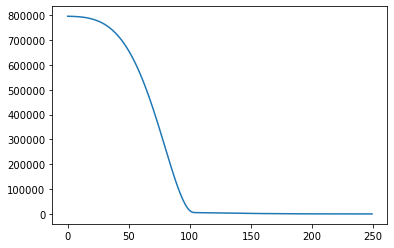

In [26]:
sns.lineplot(x = range(len(loss)), y = loss);

In [27]:
#azalması ve sonradan artmaması güzel bir gösterge
#modelimizin başarılı olabileceğini gösterir.

In [28]:
trainLoss = model.evaluate(X_train, y_train, verbose = 0)

In [29]:
testLoss = model.evaluate(X_test, y_test, verbose = 0)

In [30]:
print(trainLoss)
print(testLoss)

74.50196838378906
81.3462905883789


In [31]:
#birbirine yakın mı değil mi ona bakıyoruz
#ne kadar düşük o kadar iyi loss'lar

In [32]:
# Model Değerlendirmesi

In [33]:
testTahminleri = model.predict(X_test)

In [34]:
testTahminleri

array([[1076.1979 ],
       [ 623.13055],
       [ 874.87506],
       [ 893.2447 ],
       [ 898.543  ],
       [ 451.66245],
       [ 929.8945 ],
       [ 990.1114 ],
       [ 939.6693 ],
       [1015.3315 ],
       [ 749.9562 ],
       [ 916.41315],
       [ 946.36945],
       [1053.1047 ],
       [1119.5505 ],
       [ 680.87836],
       [1125.4962 ],
       [ 650.5312 ],
       [1153.1029 ],
       [ 885.2967 ],
       [ 891.61884],
       [ 715.748  ],
       [ 456.3335 ],
       [ 611.6866 ],
       [ 833.79785],
       [1089.4764 ],
       [ 713.02496],
       [ 756.054  ],
       [ 872.4549 ],
       [ 769.743  ],
       [ 451.13892],
       [ 781.9684 ],
       [ 727.4602 ],
       [ 646.255  ],
       [ 885.5993 ],
       [ 842.7426 ],
       [1034.1791 ],
       [1021.5087 ],
       [ 843.75073],
       [ 861.1723 ],
       [ 756.1914 ],
       [1172.9402 ],
       [1095.9807 ],
       [1086.1694 ],
       [ 871.75024],
       [ 596.0269 ],
       [1144.318  ],
       [ 971.

In [35]:
testTahminleri.shape

(330, 1)

In [36]:
tahmin_df = pd.DataFrame(y_test, columns = ["Gercek Y"])

In [37]:
tahmin_df

,Gercek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [38]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [39]:
testTahminleri

0      1076.197876
1       623.130554
2       874.875061
3       893.244690
4       898.543030
          ...     
325    1012.038696
326     789.987366
327     764.922913
328    1165.730957
329     801.990662
Length: 330, dtype: float32

In [40]:
tahmin_df = pd.concat([tahmin_df, testTahminleri], axis = 1)
tahmin_df

,Gercek Y,0
0,1081.652164,1076.197876
1,622.675990,623.130554
2,889.356810,874.875061
3,902.826733,893.244690
4,897.662404,898.543030
...,...,...
325,1028.438035,1012.038696
326,789.934950,789.987366
327,758.490486,764.922913
328,1172.871659,1165.730957


In [41]:
tahmin_df.columns = ["Gercek Y", "Tahmin Y"]

In [42]:
tahmin_df

,Gercek Y,Tahmin Y
0,1081.652164,1076.197876
1,622.675990,623.130554
2,889.356810,874.875061
3,902.826733,893.244690
4,897.662404,898.543030
...,...,...
325,1028.438035,1012.038696
326,789.934950,789.987366
327,758.490486,764.922913
328,1172.871659,1165.730957


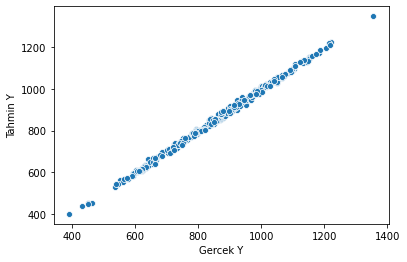

In [43]:
sns.scatterplot(x = "Gercek Y", y = "Tahmin Y", data =tahmin_df)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
mean_absolute_error(tahmin_df["Gercek Y"], tahmin_df["Tahmin Y"])

7.232083858374763

In [46]:
mean_squared_error(tahmin_df["Gercek Y"], tahmin_df["Tahmin Y"])

81.34630649998135

In [47]:
data.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [54]:
yeniBisikletOzellik = [[1751,1750]]

In [55]:
yeniBisikletOzellik = scaler.transform(yeniBisikletOzellik)

In [56]:
model.predict(yeniBisikletOzellik)

array([[913.0679]], dtype=float32)

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model.save("bisiklet_modeli.h5")

In [59]:
sonradanCagirilanModel = load_model("bisiklet_modeli.h5")

In [60]:
sonradanCagirilanModel.predict(yeniBisikletOzellik)

array([[913.0679]], dtype=float32)